# Overview

Summary, Summary, Summary...

# Notebook Set-Up

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) # make cell width expand 
pd.set_option('display.float_format', lambda x: '%.3f' % x)           # prevents scientific notation

# Import Data

The source file is in .arff format. We used scipy.io's arff function to read the file and convert to a Pandas dataframe. The Pandas's max columns function is use to display all columns within the dataset. 

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)

data = pd.read_csv('https://raw.githubusercontent.com/mattlibonati/Machine-Learning/main/datasets/bankcard_data.csv')

display(data)

pd.set_option('display.max_columns', None)

print(data.shape)
print(data.columns)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,4,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,4,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,4,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,4,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,4,no known property,23,none,for free,1,skilled,1,yes,yes,bad


(1000, 21)
Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')


# Meta Data

Before jumping into the EDA, we need to get an understanding of what data we are looking at.
* a. Check data completness (NaN's)
* b. Review volume of unique values within each column
* c. Add definitions of each column
* d. Create meta_df from details

In [7]:
meta_df = pd.DataFrame(data = data.dtypes, columns=['Format'])
meta_df.index.rename('Field', inplace = True)

##################################
# a. Check data completness (NaN's)
##################################

na_df = (data.isnull().sum() / len(data)) * 100      
na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
missing_data.index.rename('Field',inplace = True)

meta_df = meta_df.join(missing_data).fillna(0)

##################################
# b. Review volume of unique values within each column
##################################

unique_df = pd.DataFrame(data=[],columns=['Field','Unique_Values','Number of Unique Values'])

for col in data.columns:
    unique_df = unique_df.append(pd.DataFrame(data=[[col,
                                                     data[col].unique(),
                                                     len(data[col].value_counts())]],
                                              columns = ['Field','Unique_Values','Number of Unique Values']))

unique_df.set_index('Field',inplace = True)
    
meta_df = meta_df.join(unique_df)    
    
##################################
# c. Add definitions of each column
##################################

descriptions = pd.DataFrame(data = [['checking_status'        , 'Status of existing checking account, in Deutsche Mark.'                   ],
                                    ['duration'               , 'Duration in months'                                                       ],
                                    ['credit_history'         , 'Credit history (credits taken, paid back duly, delays, critical accounts)'],
                                    ['purpose'                , 'Purpose of the credit (car, television,...) '                             ],
                                    ['credit_amount'          , 'Credit amount'                                                            ],
                                    ['savings_status'         , 'Status of savings account/bonds, in Deutsche Mark.'                       ],
                                    ['employment'             , 'Present employment, in number of years'                                   ],
                                    ['installment_commitment' , 'Installment rate in percentage of disposable income'                      ],
                                    ['personal_status'        , 'Personal status (married, single,...) and sex'                            ],
                                    ['other_parties'          , 'Other debtors / guarantors'                                               ],
                                    ['residence_since'        , 'Present residence since X years'                                          ],
                                    ['property_magnitude'     , 'Property (e.g. real estate)'                                              ],
                                    ['age'                    , 'Age in years'                                                             ],
                                    ['other_payment_plans'    , 'Other installment plans (banks, stores)'                                  ],
                                    ['housing'                , 'Housing (rent, own,...)'                                                  ],
                                    ['existing_credits'       , 'Number of existing credits at this bank'                                  ],
                                    ['job'                    , 'Job'                                                                      ],
                                    ['num_dependents'         , 'Number of people being liable to provide maintenance for '                ],
                                    ['own_telephone'          , 'Telephone (yes,no)'                                                       ],
                                    ['foreign_worker'         , 'Foreign worker (yes,no)'                                                  ],
                                    ['class'                  , 'Credit classification (good or bad) response to be predicted'             ]],
                            columns = ['Field','Description'])

##################################
# d. Create meta_df from details 
##################################

descriptions.set_index('Field',inplace = True)
    
meta_df = meta_df.join(descriptions).sort_values(by = ['Format','Missing Ratio %'])

meta_df = meta_df.reset_index()

pd.set_option('display.max_colwidth', 150)

meta_df

,Field,Format,Missing Ratio %,Unique_Values,Number of Unique Values,Description
0,duration,int64,0.0,"[6, 48, 12, 42, 24, 36, 30, 15, 9, 10, 7, 60, 18, 45, 11, 27, 8, 54, 20, 14, 33, 21, 16, 4, 47, 13, 22, 39, 28, 5, 26, 72, 40]",33,Duration in months
1,credit_amount,int64,0.0,"[1169, 5951, 2096, 7882, 4870, 9055, 2835, 6948, 3059, 5234, 1295, 4308, 1567, 1199, 1403, 1282, 2424, 8072, 12579, 3430, 2134, 2647, 2241, 1804, ...",921,Credit amount
2,installment_commitment,int64,0.0,"[4, 2, 3, 1]",4,Installment rate in percentage of disposable income
3,residence_since,int64,0.0,"[4, 2, 3, 1]",4,Present residence since X years
4,age,int64,0.0,"[67, 22, 49, 45, 53, 35, 61, 28, 25, 24, 60, 32, 44, 31, 48, 26, 36, 39, 42, 34, 63, 27, 30, 57, 33, 37, 58, 23, 29, 52, 50, 46, 51, 41, 40, 66, 4...",53,Age in years
5,existing_credits,int64,0.0,"[2, 1, 3, 4]",4,Number of existing credits at this bank
6,num_dependents,int64,0.0,"[1, 2]",2,Number of people being liable to provide maintenance for
7,checking_status,object,0.0,"[<0, 0<=X<200, no checking, >=200]",4,"Status of existing checking account, in Deutsche Mark."
8,credit_history,object,0.0,"[critical/other existing credit, existing paid, delayed previously, no credits/all paid, all paid]",5,"Credit history (credits taken, paid back duly, delays, critical accounts)"
9,purpose,object,0.0,"[radio/tv, education, furniture/equipment, new car, used car, business, domestic appliance, repairs, other, retraining]",10,"Purpose of the credit (car, television,...)"


# Pre-processing

##### Specify variable lists based on column formats

In [9]:
string_cols = meta_df[(meta_df['Format'] == 'object') & (meta_df['Field'] != 'class')]['Field'].values.tolist() 
float_cols  = meta_df[meta_df['Format'] == 'float64']['Field'].values.tolist()
int_cols  = meta_df[meta_df['Format'] == 'int64']['Field'].values.tolist()

print(f'String Columns:\n{string_cols}\nFloat Columns:\n{float_cols}\nInt Columns:\n{int_cols}')

String Columns:
['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker']
Float Columns:
[]
Int Columns:
['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']


#### Create good & bad datasets

In [4]:
data_good = data[data['class'] == 'good']
data_bad  = data[data['class'] == 'bad']

print(f'Total good:{len(data_good)}\nTotal bad:{len(data_bad)}')

Total good:700
Total bad:300


##### Create univariate probability encoding values for mapping
Univariate probability encoding refers to the probability each value of each categorical column results in the event occuring and not occuring:
1. Compute occurance's by event for each column's by group
2. Compute relative deltas for each column's by group by subtracting Bad% from Good%
3. Create dictionary with ordinal ranking based on relative deltas for mapping

In [16]:
################################
# 1. Compute occurance's by event for each column's by group
freq_df = pd.DataFrame()
for col in [col for col in (string_cols + ['installment_commitment', 'residence_since', 'existing_credits', 'num_dependents'])]:
    x  = data.groupby(['class',col]).size().to_frame('occurences').reset_index()
    x2 = data.groupby(['class']).size().to_frame('possible_occurences').reset_index()
    x3 = pd.merge(x,
                  x2,
                  on = ['class'],
                  how = 'left')
    x3['concentration'] = x3['occurences']/x3['possible_occurences'] 
    x3['Field'] = col
    freq_df = freq_df.append(x3.rename(columns={col:'var'}))

display(freq_df.head())

################################
# 2. Compute relative deltas for each column's by group by subtracting Bad% from Good%
r2 = pd.merge(freq_df[freq_df['class'] == 'bad'][['var','Field','concentration']].rename(columns={'concentration':'concentration_bad'}),
              freq_df[freq_df['class'] == 'good'][['var','Field','concentration']].rename(columns={'concentration':'concentration_good'}))

r2['relative_delta'] = r2['concentration_good'] - r2['concentration_bad']  
# display(r2.sort_values(by='relative_delta',ascending=False).head())
# display(r2.sort_values(by='relative_delta',ascending=False).tail())

r = r2.sort_values(by=['Field','relative_delta'], ascending = False)

r['sum_var'] = 1
r['cum_sum'] = r.groupby('Field')['sum_var'].transform(pd.Series.cumsum)

display(r)

################################
# 3. Create dictionary with ordinal ranking based on relative deltas for mapping

dict_ls = {}
for Field in r['Field'].unique():
    df = r[r['Field'] == Field]
    dict_ls[Field] = dict(zip(df['var'], df['cum_sum']))
    
print(dict_ls)

#pd.set_option('display.max_rows', 20)

,class,var,occurences,possible_occurences,concentration,Field
0,bad,0<=X<200,105,300,0.350000,checking_status
1,bad,<0,135,300,0.450000,checking_status
2,bad,>=200,14,300,0.046667,checking_status
3,bad,no checking,46,300,0.153333,checking_status
4,good,0<=X<200,164,700,0.234286,checking_status


,var,Field,concentration_bad,concentration_good,relative_delta,sum_var,cum_sum
23,no known savings,savings_status,0.106667,0.215714,0.109048,1,1
22,>=1000,savings_status,0.020000,0.060000,0.040000,1,2
20,500<=X<1000,savings_status,0.036667,0.074286,0.037619,1,3
19,100<=X<500,savings_status,0.113333,0.098571,-0.014762,1,4
21,<100,savings_status,0.723333,0.551429,-0.171905,1,5
...,...,...,...,...,...,...,...
4,all paid,credit_history,0.093333,0.030000,-0.063333,1,5
3,no checking,checking_status,0.153333,0.497143,0.343810,1,1
2,>=200,checking_status,0.046667,0.070000,0.023333,1,2
0,0<=X<200,checking_status,0.350000,0.234286,-0.115714,1,3


{'savings_status': {'no known savings': 1, '>=1000': 2, '500<=X<1000': 3, '100<=X<500': 4, '<100': 5}, 'residence_since': {1: 1, 3: 2, 4: 3, 2: 4}, 'purpose': {'radio/tv': 1, 'used car': 2, 'retraining': 3, 'domestic appliance': 4, 'other': 5, 'repairs': 6, 'furniture/equipment': 7, 'business': 8, 'education': 9, 'new car': 10}, 'property_magnitude': {'real estate': 1, 'life insurance': 2, 'car': 3, 'no known property': 4}, 'personal_status': {'male single': 1, 'male mar/wid': 2, 'male div/sep': 3, 'female div/dep/mar': 4}, 'own_telephone': {'yes': 1, 'none': 2}, 'other_payment_plans': {'none': 1, 'stores': 2, 'bank': 3}, 'other_parties': {'guarantor': 1, 'none': 2, 'co applicant': 3}, 'num_dependents': {2: 1, 1: 2}, 'job': {'unskilled resident': 1, 'skilled': 2, 'unemp/unskilled non res': 3, 'high qualif/self emp/mgmt': 4}, 'installment_commitment': {2: 1, 1: 2, 3: 3, 4: 4}, 'housing': {'own': 1, 'for free': 2, 'rent': 3}, 'foreign_worker': {'no': 1, 'yes': 2}, 'existing_credits': {2:

##### Create Datasets
Many of the fields are string/ categorical. To handle these, we will be creating two feature sets:
1. Label encoded dataset using SciKit Learn's LabelEncoder() function
2. Univariate probability encoding using "bad" as the event

In [10]:
###################################
# label encoded dataset 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
label_encoded_df = data.copy()
label_encoded_df['class'] = label_encoded_df['class'].map({'good':0 ,'bad':1})

# Encode labels in column 'species'.
for col in (string_cols + ['installment_commitment', 'residence_since', 'existing_credits', 'num_dependents']):
    label_encoded_df[col]= label_encoder.fit_transform(label_encoded_df[col])

display(label_encoded_df)

##################################
### frequency encoded
freq_encoded_df = data.copy()
freq_encoded_df['class'] = freq_encoded_df['class'].map({'good':0 ,'bad':1})

for col in string_cols:
    freq_encoded_df[col]= freq_encoded_df[col].map(dict_ls[col])

display(freq_encoded_df)

Field,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6,1,6,1169,4,3,3,3,2,3,3,67,1,1,1,1,0,1,1,0
1,0,48,3,6,5951,2,0,1,0,2,1,3,22,1,1,0,1,0,0,1,1
2,3,12,1,2,2096,2,1,1,3,2,2,3,49,1,1,0,3,1,0,1,0
3,1,42,3,3,7882,2,1,1,3,1,3,1,45,1,0,0,1,1,0,1,0
4,1,24,2,4,4870,2,0,2,3,2,3,2,53,1,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,3,3,1736,2,1,2,0,2,3,3,31,1,1,0,3,0,0,1,0
996,1,30,3,9,3857,2,0,3,1,2,3,1,40,1,1,0,0,0,1,1,0
997,3,12,3,6,804,2,3,3,3,2,3,0,38,1,1,0,1,0,0,1,0
998,1,45,3,6,1845,2,0,3,3,2,3,2,23,1,0,0,1,0,1,1,1


Field,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,4,6,1,1,1169,1,2,4,1,2,4,1,67,1,1,2,2,1,1,2,0
1,3,48,3,1,5951,5,3,2,4,2,2,1,22,1,1,1,2,1,2,2,1
2,1,12,1,9,2096,5,1,2,1,2,3,1,49,1,1,1,1,2,2,2,0
3,4,42,3,7,7882,5,1,2,1,1,4,2,45,1,2,1,2,2,2,2,0
4,4,24,2,10,4870,5,3,3,1,2,4,4,53,1,2,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,12,3,7,1736,5,1,3,4,2,4,1,31,1,1,1,1,1,2,2,0
996,4,30,3,2,3857,5,3,4,3,2,4,2,40,1,1,1,4,1,1,2,0
997,1,12,3,1,804,5,2,4,1,2,4,3,38,1,1,1,2,1,2,2,0
998,4,45,3,1,1845,5,3,4,1,2,4,4,23,1,2,1,2,1,1,2,1


##### Scale Variables

In [11]:
# Sklearn standardscaler library
from sklearn.preprocessing import StandardScaler

features = [col for col in data.columns if col != 'class']

def scale_set(df):
    scale_df = df.copy()
    
    # Separating out the features
    x = df.loc[:, features].values
    # Separating out the target
    y = pd.DataFrame(df.loc[:,['class']].values,columns=['class'])
    # Standardizing the features
    x = pd.DataFrame(StandardScaler().fit_transform(x), columns = [col for col in df.columns if col != 'class'])
    
    return x.join(y)

# EDA

##### Descriptive Stats

In [12]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

# Describe Data
display_side_by_side(label_encoded_df.describe().T,freq_encoded_df.describe().T)
display_side_by_side(scale_set(label_encoded_df).describe().T,scale_set(freq_encoded_df).describe().T)

,count,mean,std,min,25%,50%,75%,max
Field,,,,,,,,
checking_status,1000.000,1.582,1.253,0.000,0.000,1.000,3.000,3.000
duration,1000.000,20.903,12.059,4.000,12.000,18.000,24.000,72.000
credit_history,1000.000,2.219,1.064,0.000,1.000,3.000,3.000,4.000
purpose,1000.000,4.484,2.421,0.000,3.000,4.000,6.000,9.000
credit_amount,1000.000,3271.258,2822.737,250.000,1365.500,2319.500,3972.250,18424.000
savings_status,1000.000,2.145,1.111,0.000,2.000,2.000,2.000,4.000
employment,1000.000,1.525,1.344,0.000,0.000,1.000,3.000,4.000
installment_commitment,1000.000,1.973,1.119,0.000,1.000,2.000,3.000,3.000
personal_status,1000.000,1.878,1.351,0.000,0.000,3.000,3.000,3.000


,count,mean,std,min,25%,50%,75%,max
checking_status,1000.000,-0.000,1.001,-1.263,-1.263,-0.465,1.132,1.132
duration,1000.000,0.000,1.001,-1.402,-0.739,-0.241,0.257,4.239
credit_history,1000.000,-0.000,1.001,-2.087,-1.146,0.734,0.734,1.675
purpose,1000.000,0.000,1.001,-1.853,-0.613,-0.200,0.626,1.866
credit_amount,1000.000,0.000,1.001,-1.071,-0.675,-0.337,0.248,5.371
savings_status,1000.000,0.000,1.001,-1.931,-0.131,-0.131,-0.131,1.670
employment,1000.000,0.000,1.001,-1.135,-1.135,-0.391,1.098,1.842
installment_commitment,1000.000,-0.000,1.001,-1.765,-0.870,0.024,0.918,0.918
personal_status,1000.000,-0.000,1.001,-1.391,-1.391,0.831,0.831,0.831
other_parties,1000.000,-0.000,1.001,-4.193,0.301,0.301,0.301,0.301


##### Analyze concentration of categorical variables by good/ bad status

In [10]:
import seaborn as sns                       # import seaborn
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,5)     # specify chart size
# define sns barplot for analyzing concentration of categorical values
def sns_bar_plot(df, val_grp, val_freq):
    return sns.barplot(df=val_freq, y='concentration', hue=val_grp, data=df)

for col in (string_cols + ['installment_commitment', 'residence_since', 'existing_credits', 'num_dependents']):
    df = freq_df[freq_df['Field'] == col]
    df.rename(columns={'var':col}, inplace = True)
    sns.barplot(x=df[col], y='concentration', hue='class', data=df)
    print(col)
    plt.show()

NameError: name 'freq_df' is not defined

##### Analyze Continuous variables

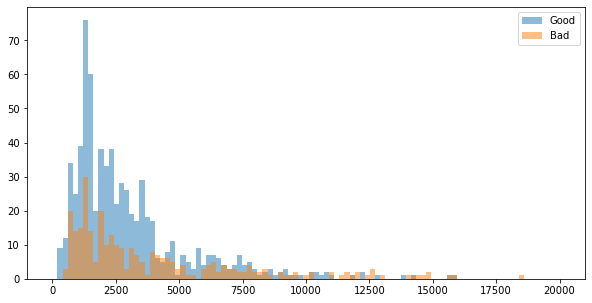

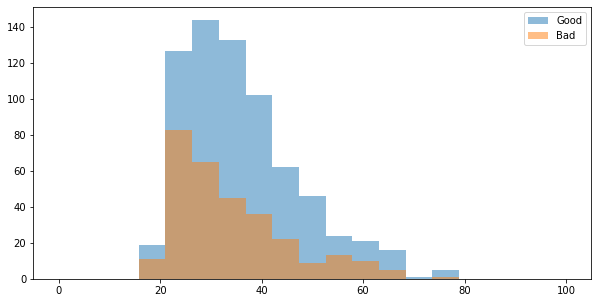

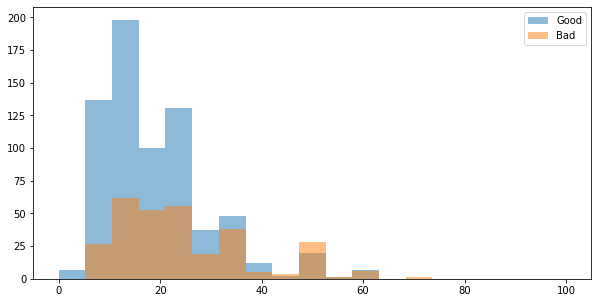

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5) 

# histogram of continuous var distributions
def hist_plot(freq_var, bins):
    plt.hist(data_good[freq_var], bins, alpha=0.5, label='Good')
    plt.hist(data_bad[freq_var] , bins, alpha=0.5, label='Bad')
    plt.legend(loc='upper right')

    return plt.show()

hist_plot('credit_amount',np.linspace(0, 20000, 100))
hist_plot('age',np.linspace(0, 100, 20))
hist_plot('duration',np.linspace(0, 100, 20))

# Model Development

##### Test/ Train Split

In [16]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

def model_sets(df,independent_vars,dependent_var):
    X = df[independent_vars].to_numpy()
    y = df[dependent_var].to_numpy()

    # splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

    ### Rebuild Train Set into DF
    X_train = pd.DataFrame(data = X_train, columns = independent_vars)
    y_train = pd.DataFrame(data = y_train, columns = dependent_var)
    train_df = X_train.join(y_train)

    ### Rebuild Test Set into DF
    X_test = pd.DataFrame(data = X_test, columns = independent_vars)
    y_test = pd.DataFrame(data = y_test, columns = dependent_var)
    test_df = X_test.join(y_test)

    return train_df, test_df, X_train, X_test, y_train, y_test

#############
# Prime Datasets
features = [col for col in data.columns if col != 'class']

independent_vars = features 
dependent_var    = ['class']

base_case_set = model_sets(data[int_cols+['class']],int_cols,['class'])

############
# model sets 
# Base Case (Label Encoded)
label_encoded_set        = model_sets(label_encoded_df,independent_vars,dependent_var)
label_encoded_set_scaled = model_sets(scale_set(label_encoded_df),independent_vars,dependent_var)

# Frequency Encoded
freq_encoded_set         = model_sets(freq_encoded_df,independent_vars,dependent_var)
freq_encoded_set_scaled  = model_sets(scale_set(freq_encoded_df),independent_vars,dependent_var)

#######
# Display Tables 
display(base_case_set[0])

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class
0,60,6836,3,4,63,2,1,bad
1,21,2319,2,1,33,1,1,bad
2,6,1236,2,4,50,1,1,good
3,21,5003,1,4,29,2,1,bad
4,12,886,4,2,21,1,1,good
...,...,...,...,...,...,...,...,...
795,18,6458,2,4,39,2,2,bad
796,18,2662,4,3,32,1,1,good
797,24,5804,4,2,27,2,1,good
798,12,1484,2,1,25,1,1,bad


##### Dimension Reduction - PCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
credit_amount,0.493,-0.156,0.030,0.088,0.305,-0.228,-0.187,-0.003,-0.061,-0.089,-0.014,0.017,0.119
duration,0.402,-0.135,-0.010,-0.173,0.190,-0.140,-0.230,-0.214,-0.160,-0.300,0.069,-0.049,0.147
job,0.393,-0.090,-0.243,0.081,-0.041,0.327,0.122,0.285,-0.002,0.130,0.149,0.096,-0.106
property_magnitude,0.371,-0.112,0.086,-0.047,-0.148,0.145,0.168,-0.266,-0.001,0.142,-0.053,-0.024,-0.028
residence_since,0.158,0.137,0.410,0.117,-0.494,-0.041,-0.130,-0.015,-0.020,-0.042,-0.013,0.125,0.185
age,0.154,0.350,0.215,0.038,-0.177,0.080,0.121,0.366,0.098,-0.130,-0.368,0.106,0.400
other_parties,0.144,-0.024,-0.173,0.335,-0.085,-0.143,0.610,-0.422,-0.179,0.116,-0.148,0.121,0.153
foreign_worker,0.123,-0.053,-0.134,-0.199,-0.218,0.145,-0.237,-0.298,0.251,0.022,-0.539,-0.476,-0.046
other_payment_plans,0.094,-0.018,0.134,-0.269,0.128,0.054,0.206,-0.180,0.732,-0.109,0.177,0.358,-0.016
housing,0.077,-0.242,0.301,0.224,-0.376,-0.030,-0.163,-0.108,0.027,0.305,0.367,-0.090,-0.200


,Component,Field
0,PC1,credit_amount
1,PC10,purpose
2,PC11,foreign_worker
3,PC12,foreign_worker
4,PC13,employment
5,PC2,credit_history
6,PC3,residence_since
7,PC4,installment_commitment
8,PC5,residence_since
9,PC6,savings_status


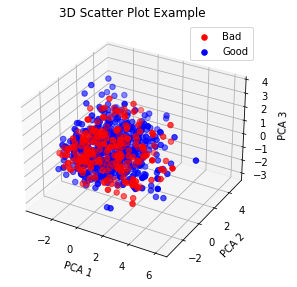

In [17]:
# function to plot pca componments into clusers by party labels
def pca_plot(df):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')

    ax.scatter(df[df['class'] == 1]['PC1'], df[df['class'] == 1]['PC2'], df[df['class'] == 1]['PC3'], c='red',  s=30, label = 'Bad')
    ax.scatter(df[df['class'] == 0]['PC1'], df[df['class'] == 0]['PC2'], df[df['class'] == 0]['PC3'], c='blue', s=30, label = 'Good')
    
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
    ax.set_zlabel('PCA 3')
    _ = plt.title("3D Scatter Plot Example")
    _ = plt.legend()
    _ = plt.tight_layout()
    _ = plt.show()
    return _

#### PCA Function

from sklearn.decomposition import PCA
import numpy as np

def perform_pca(df_set, pca_param):

    pca_input = df_set.copy()

    pca = PCA(pca_param) # alternative PCA method which chooses least components for specified variance 
    x = pca_input.iloc[:, :-1] # set x to explanatory variables
    principalComponents = pca.fit_transform(x)
    
    pca_cols = []
    for i in range(0,pca.n_components_):
        pca_cols.append('PC'+str(i+1))
    
    principalDf = pd.DataFrame(data=principalComponents, columns=pca_cols).join(pca_input[['class']])
    
    #print(pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_))
    
    # PCA Loadings
    loadings = pd.DataFrame(pca.components_.T, columns=pca_cols, index=pca_input.columns[0:-1]).sort_values(by=pca_cols, ascending = False)

    # most important factors    
    most_important = [np.abs(pca.components_[i]).argmax() for i in range(pca.n_components_)]
    most_important_names = [features[most_important[i]] for i in range(pca.n_components_)]       # get the names
    dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(pca.n_components_)}        # create reference dict    
    pca_3_df = pd.DataFrame(sorted(dic.items()),columns = ['Component','Field']) # build the dataframe
    
    return loadings, pca_3_df, principalDf 

###################
# Plot Options
# pylab for 3d plot
#%pylab
%matplotlib inline  
display(perform_pca(freq_encoded_set_scaled[0], .80)[0])
model_sets(scale_set(freq_encoded_df),independent_vars,dependent_var)

display(perform_pca(freq_encoded_set_scaled[0], .80)[1])

pca_plot(perform_pca(freq_encoded_set_scaled[0], .80)[2])

##### Autoencoded Model

Epoch 1/15
32/32 [==============================] - 1s 15ms/step - loss: 0.4903 - mae: 0.4903 - val_loss: 0.4704 - val_mae: 0.4704
Epoch 2/15
32/32 [==============================] - 0s 5ms/step - loss: 0.4236 - mae: 0.4236 - val_loss: 0.3602 - val_mae: 0.3602
Epoch 3/15
32/32 [==============================] - 0s 5ms/step - loss: 0.3259 - mae: 0.3259 - val_loss: 0.3060 - val_mae: 0.3060
Epoch 4/15
32/32 [==============================] - 0s 5ms/step - loss: 0.3020 - mae: 0.3020 - val_loss: 0.3001 - val_mae: 0.3001
Epoch 5/15
32/32 [==============================] - 0s 4ms/step - loss: 0.2997 - mae: 0.2997 - val_loss: 0.2991 - val_mae: 0.2991
Epoch 6/15
32/32 [==============================] - 0s 5ms/step - loss: 0.2987 - mae: 0.2987 - val_loss: 0.2980 - val_mae: 0.2980
Epoch 7/15
32/32 [==============================] - 0s 4ms/step - loss: 0.2973 - mae: 0.2973 - val_loss: 0.2957 - val_mae: 0.2957
Epoch 8/15
32/32 [==============================] - 0s 5ms/step - loss: 0.2945 - mae: 0.2

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,class
0,0.000,0.000,5.496,3.454,5.224,2.806,0.000,0
1,0.390,1.101,0.000,0.000,0.000,0.000,0.000,1
2,0.000,0.000,2.454,3.109,3.176,1.202,0.000,0
3,0.475,1.264,0.000,0.032,0.279,0.000,0.000,0
4,0.415,0.885,0.000,0.042,0.367,0.000,0.000,1
...,...,...,...,...,...,...,...,...
995,0.000,0.000,3.284,2.058,3.273,1.336,0.000,0
996,0.100,0.282,1.118,0.627,0.788,0.658,0.000,0
997,0.000,0.000,4.457,2.694,3.900,1.956,0.196,0
998,0.343,0.708,0.581,0.364,0.145,0.000,0.000,1


,Epoch,loss,mae,val_loss,val_mae
0,1,0.490,0.490,0.470,0.470
1,2,0.424,0.424,0.360,0.360
2,3,0.326,0.326,0.306,0.306
3,4,0.302,0.302,0.300,0.300
4,5,0.300,0.300,0.299,0.299
5,6,0.299,0.299,0.298,0.298
6,7,0.297,0.297,0.296,0.296
7,8,0.294,0.294,0.292,0.292
8,9,0.291,0.291,0.288,0.288
9,10,0.287,0.287,0.283,0.283


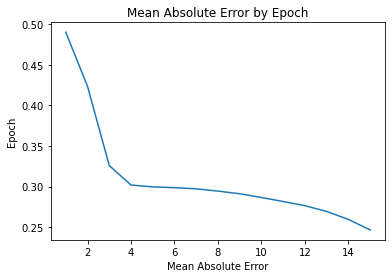

In [18]:
##### Max this min max scaling
##### Technically test train split should occur here ,not after
import math
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError

autoencoder_base = scale_set(label_encoded_df)
ind_vars_aa = [col for col in autoencoder_base if col != 'class']

# Train the autoencoder with the training data.
class AutoEncoders(Model):
    def __init__(self, output_units):
        super().__init__()
        self.encoder = Sequential(
            [Dense(32, activation="relu"),
             Dense(16, activation="relu"),
             Dense(7, activation="relu")])

        self.decoder = Sequential(
            [Dense(16, activation="relu"),
             Dense(32, activation="relu"),
             Dense(output_units, activation="sigmoid")])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded
    
auto_encoder = AutoEncoders(len(ind_vars_aa))

auto_encoder.compile(loss='mae', metrics=['mae'], optimizer='adam')

history = auto_encoder.fit(autoencoder_base[ind_vars_aa], 
                           autoencoder_base['class'], 
                           epochs=15, 
                           batch_size=32, 
                           validation_data=(autoencoder_base[ind_vars_aa], autoencoder_base['class']))

layer_ls = [layer.name for layer in auto_encoder.layers] # obtains list of layers 
encoder_layer   = auto_encoder.get_layer(layer_ls[0])    # get first layer on list
autoendcoder_df = pd.DataFrame(encoder_layer.predict(autoencoder_base[ind_vars_aa])).add_prefix('feature_').join(autoencoder_base['class'])
display(autoendcoder_df)

##############
# Plot Data

# convert the history.history dictionary to a pandas dataframe:     
hist_df = pd.DataFrame(history.history).reset_index()
hist_df.rename(columns = {'index':'Epoch'}, inplace = True)
hist_df['Epoch'] = hist_df['Epoch'] + 1

display(hist_df)
   
mae   = hist_df['mae']
epoch = hist_df['Epoch']
  
plt.plot(epoch, mae)
plt.title('Mean Absolute Error by Epoch')
plt.xlabel('Mean Absolute Error')
plt.ylabel('Epoch')
plt.show()

##### Model: Logistic Regression

In [19]:
#################
# [0]: train_df, 
# [1]: test_df, 
# [2]: X_train, 
# [3]: X_test, 
# [4]: y_train,
# [5]: y_test


from sklearn.linear_model import LogisticRegression

def log_reg(X_train,y_train,X_test,model):
    log_reg = LogisticRegression(max_iter=7600)
    log_reg.fit(X_train,y_train.values.ravel())                               # used ravel https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
    return pd.DataFrame(data = log_reg.predict(X_test), columns = [model]) 


def log_reg_modelset(model_set):
    return model_set[1].join(log_reg(model_set[2],model_set[4],model_set[3],'y_pred'))

# Model Validation

##### Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix 

features = [col for col in data.columns if col != 'class']

independent_vars = features 
dependent_var    = ['class']

pca_base                = perform_pca(scale_set(freq_encoded_df), .80)
ind_vars_pca            = list(pca_base[1]['Field'].unique())
freq_encoded_scaled_pca = scale_set(freq_encoded_df)[ind_vars_pca+['class']]

ind_vars_aa = [col for col in autoendcoder_df if col != 'class']

score_df = pd.DataFrame()
score_ls = []

base_case_input = data[int_cols+['class']].copy() 
base_case_input['class'] = base_case_input['class'].map({'good':0 ,'bad':1})

# original DF names here
dfs = [[base_case_input                                  , 'base_case'                         , int_cols      ],
       [label_encoded_df                                 , 'label_encoded_model'               , independent_vars],
       [scale_set(label_encoded_df)                      , 'label_encoded_model_scaled'        , independent_vars],
       [freq_encoded_df                                  , 'relative_delta_encoded'            , independent_vars],
       [scale_set(freq_encoded_df)                       , 'relative_delta_encoded_scaled'     , independent_vars],
       [freq_encoded_scaled_pca                          , 'relative_delta_encoded_scaled_pca' , ind_vars_pca    ],
       [autoendcoder_df                                  , 'AutoEncoder'                       , ind_vars_aa]]
 
for df in dfs:
    df_set      = model_sets(df[0],df[2],dependent_var)                             # model set creates different cuts  
    df_model    = log_reg_modelset(df_set)                                          # run log reg on datasets
    conf_matrix = confusion_matrix(df_model[['class']], df_model[['y_pred']])
    
    print(conf_matrix)

    score_df = score_df.append(pd.DataFrame([[df[1],conf_matrix[0][0],conf_matrix[0][1],conf_matrix[1][0],conf_matrix[1][1]]])) 
    
score_df.columns = ['Model','TT','TF','FT','FF']

score_df['Type I Error']  = score_df['TF'] * 1
score_df['Type II Error'] = score_df['FT'] * 5
score_df['Score']         = score_df['Type I Error'] + score_df['Type II Error'] 

score_df.sort_values(by='Score', inplace = True)  

display(score_df)

[[140   1]
 [ 51   8]]
[[126  15]
 [ 40  19]]
[[126  15]
 [ 39  20]]
[[126  15]
 [ 35  24]]
[[126  15]
 [ 25  34]]
[[130  11]
 [ 36  23]]
[[137   4]
 [ 35  24]]


,Model,TT,TF,FT,FF,Type I Error,Type II Error,Score
0,relative_delta_encoded_scaled,126,15,25,34,15,125,140
0,AutoEncoder,137,4,35,24,4,175,179
0,relative_delta_encoded,126,15,35,24,15,175,190
0,relative_delta_encoded_scaled_pca,130,11,36,23,11,180,191
0,label_encoded_model_scaled,126,15,39,20,15,195,210
0,label_encoded_model,126,15,40,19,15,200,215
0,base_case,140,1,51,8,1,255,256
